In [32]:
import numpy as np
import pandas as pd
import random

from matplotlib import pyplot as plt

%matplotlib inline

# Уменьшение размерности

## Задача уменьшения размерности

Задача состоит в сжатии выборки: нужно перевести точки из N-мерного пространства в M-мерное пространство, где N < M, причем так, чтобы близкие точки остались близкими.

Эта задача является примером unsupervised learning, так как у нас нет никаких меток, которые надо предсказать. Соответственно, и делить на train и test выборку бессмысленно.

Для примеров мы будем чаще всего переводить в 2-мерное пространство - это хороший способ визаулизировать датасет.

## Пример: визуализируем датасет с рисунками цифр

### Загрузим датасет

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

### Нарисуем несколько примеров цифр оттуда
Каждая цифра - это рисунок 8x8 пикселей, каждый из них представлен числом от 0 (белый) до 16 (черный).

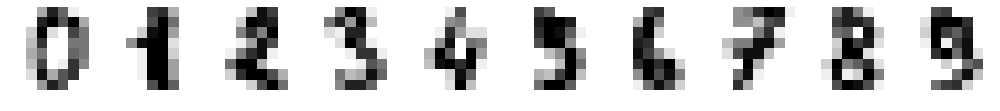

In [37]:
def plot_image(image_id, dataset=X, im_size=28):
    plt.imshow(dataset[image_id,:].reshape(im_size, im_size), cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols, dataset=X, im_size=8):
    fig = plt.gcf()
    fig.set_size_inches(17.5,15.5)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id, dataset, im_size)
        plt.axis('off')
plot_grid(range(10), nrows=1, ncols=10)

### Уменьшим размерность тремя алгоритмами
Переведем 64-мерные векторы в двумерное пространство ($8 \times 8 = 64$).

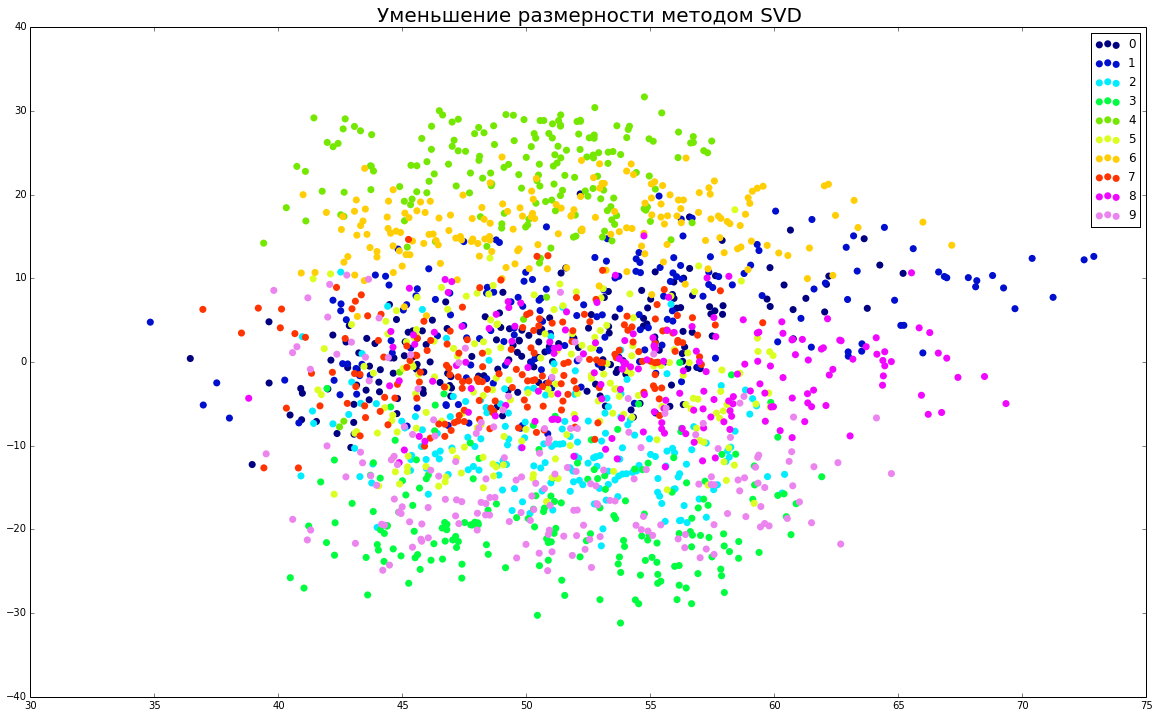

In [38]:
from sklearn.decomposition import TruncatedSVD
from matplotlib.colors import Normalize
svd = TruncatedSVD(n_components=2)

X_svd = svd.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(10):
    norm = Normalize(vmin=0, vmax=10)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_svd[:, 0][y == d],
                X_svd[:, 1][y == d],
                c=[color] * len(X_svd[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом SVD", fontsize=20)
plt.legend()

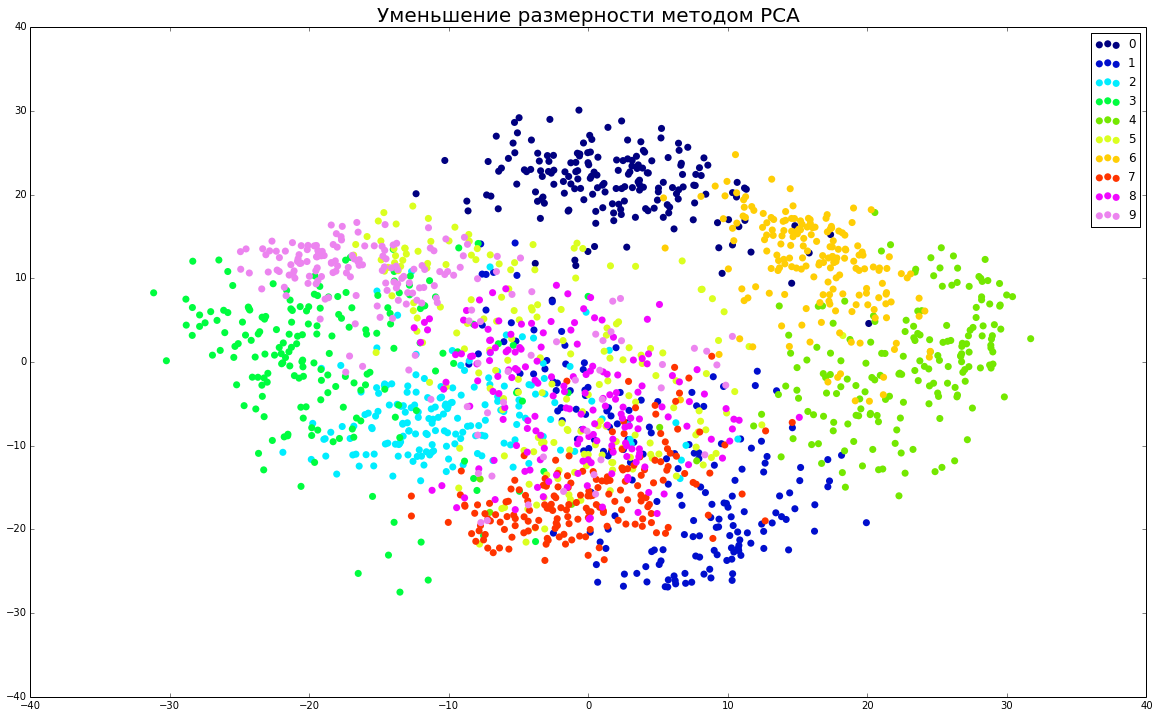

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(10):
    norm = Normalize(vmin=0, vmax=10)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_pca[:, 0][y == d],
                X_pca[:, 1][y == d],
                c=[color] * len(X_pca[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом PCA", fontsize=20)
plt.legend()

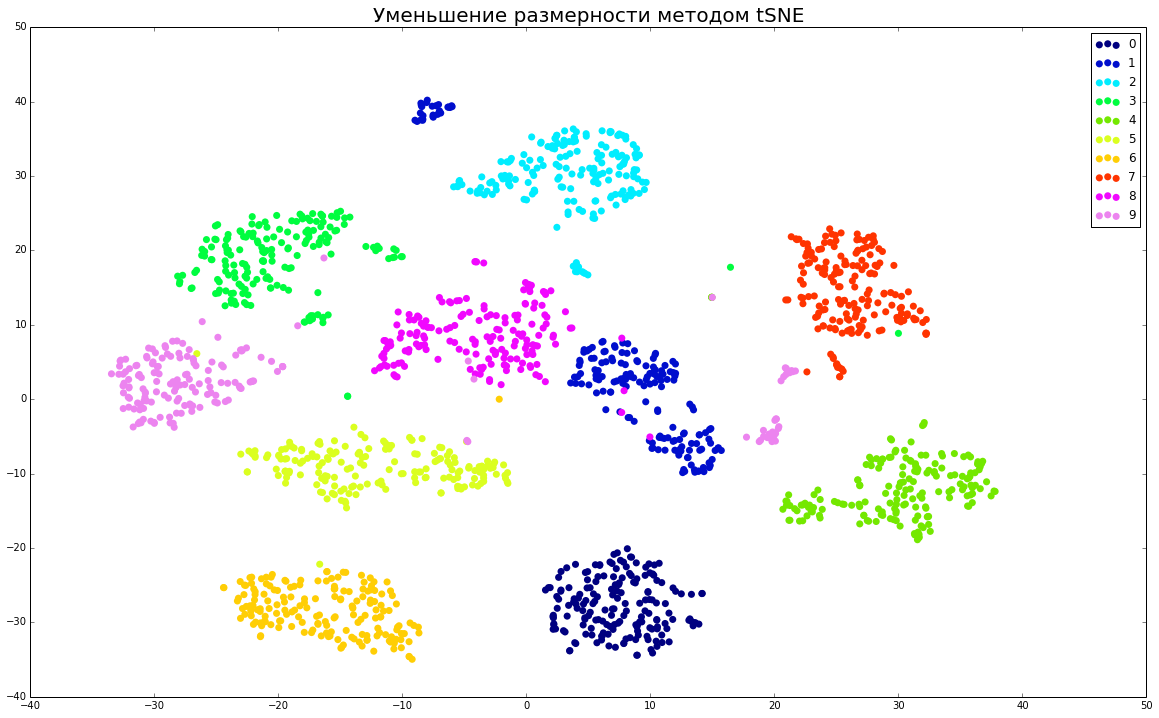

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, n_iter=400)

X_tsne = tsne.fit_transform(X)
plt.figure(figsize=(20, 12))
for d in range(10):
    norm = Normalize(vmin=0, vmax=10)
    color = plt.cm.gist_ncar(norm(d))
    plt.scatter(X_tsne[:, 0][y == d],
                X_tsne[:, 1][y == d],
                c=[color] * len(X_tsne[:, 0][y == d]), label=d, edgecolor='none', s=50)
plt.title(u"Уменьшение размерности методом tSNE", fontsize=20)
plt.legend()

### Выводы
Заметьте, что мы никак не использовали метки классов.

Несмотря на то, что мы выкинули очень много данных, кажется, что во вложении tSNE решить задачу классификации стало только проще.

А вот SVD и PCA при вложении потеряли много информации, и качество должно ухудшиться (зато работают быстрее).

Давайте проверим.

In [41]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier

print 'X',  cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy').mean()
print 'X_svd_2D',  cross_val_score(KNeighborsClassifier(), X_svd, y, scoring='accuracy').mean()
print 'X_pca_2D',  cross_val_score(KNeighborsClassifier(), X_pca, y, scoring='accuracy').mean()
print 'X_tsne_2D',  cross_val_score(KNeighborsClassifier(), X_tsne, y, scoring='accuracy').mean()

X 0.962731717844
X_svd_2D 0.393512833449
X_pca_2D 0.609392410839
X_tsne_2D 0.978872694231


Действительно, при применении SVD и PCA было выкинуто слишком много информации, а вот X_tsne только улучшил качество.

Давайте теперь посмотрим, что будет, если уменьшать размерность не до 2, а, например, до 10. Вот только так хорошо показавший себя TSNE умеет понижать размерность только до 1, 2 или 3.

In [44]:
svd = TruncatedSVD(n_components=10)
X_svd = svd.fit_transform(X)

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

tsne_1d = TSNE(n_components=1, n_iter=400) # tsne работает только для размерностей 1, 2, 3
X_tsne_1d = tsne_1d.fit_transform(X)

tsne_3d = TSNE(n_components=3, n_iter=400)
X_tsne_3d = tsne_3d.fit_transform(X)

In [45]:
print 'X',  cross_val_score(KNeighborsClassifier(), X, y, scoring='accuracy').mean()
print 'X_svd_10D',  cross_val_score(KNeighborsClassifier(), X_svd, y, scoring='accuracy').mean()
print 'X_pca_10D',  cross_val_score(KNeighborsClassifier(), X_pca, y, scoring='accuracy').mean()
print 'X_tsne_1D',  cross_val_score(KNeighborsClassifier(), X_tsne_1d, y, scoring='accuracy').mean()
print 'X_tsne_3D',  cross_val_score(KNeighborsClassifier(), X_tsne_3d, y, scoring='accuracy').mean()

X 0.962731717844
X_svd_10D 0.939361868856
X_pca_10D 0.937116357041
X_tsne_1D 0.971610431903
X_tsne_3D 0.91708257721


Более интересно будет нарисовать график зависимости качества от размерности.

In [46]:
svd_scores = []
pca_scores = []

for dim in range(1, 64):
    svd = TruncatedSVD(n_components=dim)
    X_svd = svd.fit_transform(X)
    svd_scores.append(cross_val_score(KNeighborsClassifier(), X_svd, y, scoring='accuracy').mean())
    
    pca = PCA(n_components=dim)
    X_pca = pca.fit_transform(X)
    pca_scores.append(cross_val_score(KNeighborsClassifier(), X_pca, y, scoring='accuracy').mean())

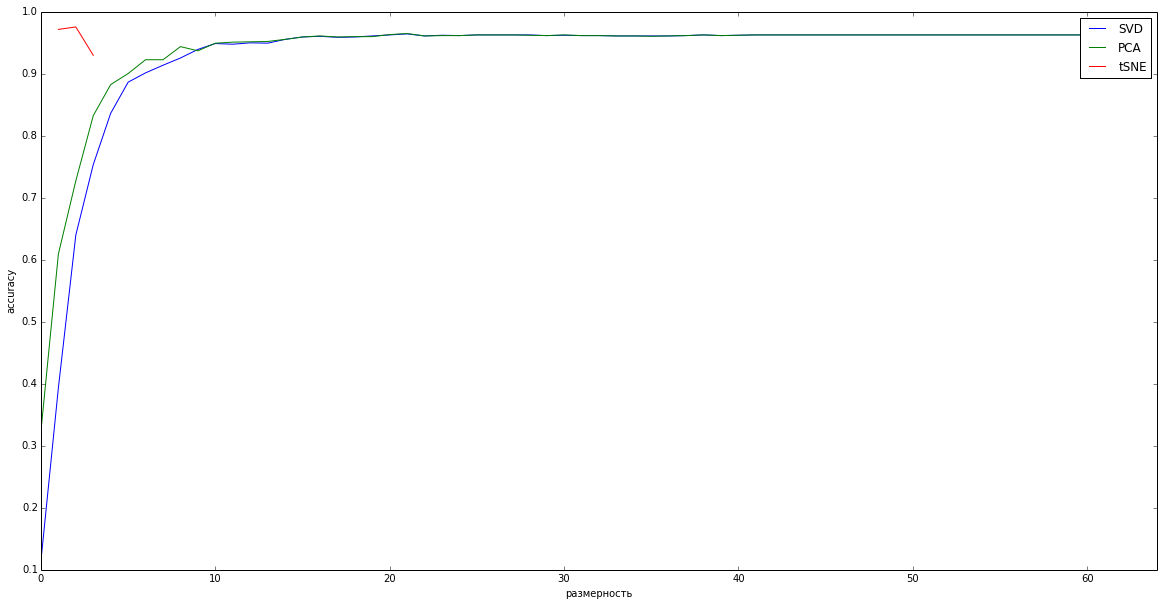

In [47]:
plt.figure(figsize=(20, 10))
plt.plot(svd_scores, label='SVD')
plt.plot(pca_scores, label='PCA')
plt.plot([1, 2, 3], [0.971610431903, 0.975547717759, 0.92988191018], label='tSNE')
plt.xlim((0, 64))
plt.xlabel(u"размерность")
plt.ylabel(u"accuracy")
plt.legend()

Как видно, и правда лучше, чем TSNE 2D уменьшить размерность не получается.

Зато если пользоваться методами SVD и PCA, то видно, что достаточно выбрать размерность 10, чтобы результат не сильно отличался от их наилучшего.

### Задание

Нарисуйте такой же график для двух каких-нибудь других классификаторов помимо KNN, сделайте выводы.

### Решение:

## Подробнее про алгоритмы
### SVD

В этом методе уменьшения размерности применяется <a href='https://ru.wikipedia.org/wiki/Сингулярное_разложение'> SVD-разложение </a> матрицы признаков.

Что это такое? Это единственное представление матрицы в виде произведения трех других:

$$A = U \Sigma V$$

где $A$- прямоугольная матрица признаков, $\Sigma$ - прямоугольная диагональная, причем числа на диагонали неотрицательны и убывают, $U$ и $V$ - квадратные и унитарные (неважно, что это значит, но по смыслу - это что-то вроде поворота пространства)

Нас больше всего будет интересовать матрица $\Sigma$.

#### Пример SVD-разложения

In [247]:
A = np.matrix([[10, 50, 3, -3, 1],
               [10, 60, 3, -2, 0],
               [10, 10, 40, -6, 0],
               [10, 10, 3, -20, 1]])
A

matrix([[ 10,  50,   3,  -3,   1],
        [ 10,  60,   3,  -2,   0],
        [ 10,  10,  40,  -6,   0],
        [ 10,  10,   3, -20,   1]])

In [248]:
U, Sigma, V = np.linalg.svd(A)
U

matrix([[-0.61718949, -0.15010062,  0.03306074, -0.77165661],
        [-0.73217042, -0.21144722,  0.13777698,  0.63264054],
        [-0.23080532,  0.95240343,  0.19898409,  0.00786987],
        [-0.17243118,  0.16027345, -0.96970605,  0.06519269]])

In [249]:
S = np.hstack((np.diag(Sigma), np.matrix([[0], [0], [0], [0]])))
S

matrix([[ 82.32549024,   0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,  40.11257201,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,  19.75981576,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   1.02220549,   0.        ]])

In [250]:
V

matrix([[ -2.12886241e-01,  -9.57444220e-01,  -1.67597984e-01,
           9.89895696e-02,  -9.59144816e-03],
        [  1.87255269e-01,  -2.25991371e-01,   9.34677392e-01,
          -2.00602776e-01,   2.53607128e-04],
        [ -3.03587972e-01,   1.11966440e-01,   2.81518749e-01,
           9.02107615e-01,  -4.74015203e-02],
        [ -6.45207921e-01,   1.03920015e-01,   9.12975110e-02,
          -2.94837209e-01,  -6.91117322e-01],
        [ -6.41214468e-01,   9.43006548e-02,   1.03445869e-01,
          -2.21883894e-01,   7.21122654e-01]])

In [252]:
print "%.6f" % np.linalg.norm(U * S * V - A)

0.000000


Действительно, $U \Sigma V = A$. Здесь я проверяю это через норму их разности. Нормой матрицы называют корень из суммы квадратов всех ее элементов. Когда норма разности матриц равна нулю, они равны.

#### Давайте обнулять числа на диагонали

Заметим, что на диагонали в матрице 4x5 $\Sigma$ стоят числа 82.3, 40.11, 19.75, 1.02.
Давайте возьмем и заменим 1.022 на 0 и посмотрим, что случится с $A$

In [253]:
S[3, 3] = 0
S

matrix([[ 82.32549024,   0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,  40.11257201,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,  19.75981576,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ]])

In [255]:
print "%.6f" % np.linalg.norm(U * S * V - A)

1.022205


#### Давайте дальше обнулять числа на диагонали

Заметьте, что числа изменились очень мало! Давайте обнулим еще одно число на диагонали.

In [257]:
S[2, 2] = 0
S

matrix([[ 82.32549024,   0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,  40.11257201,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,   0.        ]])

In [258]:
print "%.6f" % np.linalg.norm(U * S * V - A)

19.786238


#### Давайте оставим только $R$ чисел на диагонали и выкинем все, что умножается на ноль

Все еще изменения относительно маленькие. Так будет всегда, причем чем меньше число на диагонали мы обнуляем - тем меньше изменения.

Давайте обнулим все числа на диагонали $\Sigma$, кроме первых $R = 2$ (мы это уже сделали). Давайте оставим только $R$ столбцов в $U$ и $R$ строк в $V$, раз остальные столбцы/строки все равно умножаются только на нулевые столбцы/строки. Итоговое произведение измениться не должно:



In [261]:
print "%.6f" % np.linalg.norm(U[:, :2] * S[:2, :2] * V[:2, :] - A)

19.786238


In [262]:
U[:, :2] * S[:2, :2] * V[:2, :]

matrix([[  9.68939158,  50.00882645,   2.88810578,  -3.82188873,
           0.48581863],
        [ 11.24375101,  59.62797333,   2.17453886,  -4.26527294,
           0.57598588],
        [ 11.19886465,   9.55892439,  38.89236508,  -9.54461512,   0.1919373 ],
        [  4.22588311,  12.13848753,   8.38815659,  -2.69487589,
           0.13778566]])

In [263]:
A

matrix([[ 10,  50,   3,  -3,   1],
        [ 10,  60,   3,  -2,   0],
        [ 10,  10,  40,  -6,   0],
        [ 10,  10,   3, -20,   1]])

Такое приближение матрицы A матрицей ранга R (если вы знаете что такое ранг) - оптимально, а именно на нем достигается минимум нормы разности.

А теперь посмотрим внимательнее на матрицу $U_{R} \Sigma_{R}$:


In [231]:
U[:, :2] * S[:2, :2]

matrix([[-50.81042749,  -6.02092175],
        [-60.27628867,  -8.48169184],
        [-19.00116138,  38.2033513 ],
        [-14.19548139,   6.42898029]])

Эта матрица и будет матрицей $A_{new}$, где каждый элемент представляется не 5 признаками, а 2 признаками, ее и называют ** усеченным SVD-разложением **, так как мы отсекли несколько чисел с диагонали $\Sigma$.

In [242]:
TruncatedSVD(n_components=2).fit_transform(A)

array([[ 50.81042749,  -6.02092175],
       [ 60.27628867,  -8.48169184],
       [ 19.00116138,  38.2033513 ],
       [ 14.19548139,   6.42898029]])

При применении встроенной функции матрица получилась немного другой, но это потому что такая матрица определяется с точностью до поворота.

Запомните SVD-разложение, оно еще может пригодиться.

### PCA  (метод главных компонент)

<a href='http://setosa.io/ev/principal-component-analysis/'> Визуализация </a>

<a href='https://ru.wikipedia.org/wiki/Метод_главных_компонент'> Метод PCA </a> заключается в том, чтобы найти в N-мерном пространстве такое K-мерное пространство, что проекция всех точек на него будет как можно более рассеянной (то есть иметь наибольшую дисперсию).

Оказывается, подходит пространство, сумма квадратов расстояния от которого до всех точек минимальна. То есть оно оптимально сразу в двух смыслах.


Первая компонента выбирается так, чтобы была дисперсия проекция вдоль нее была максимальна:

![dispersion.jpg](dispersion.jpg)

И каждая следующая выбирается так же относительно проекций.

Получившиеся К компонент будут образовывать K-мерное пространство, проекция точек на которое будет иметь наибольную дисперсию.

### Задание

Объясните, в чем отличие задачи, решаемой PCA от задачи, решаемой Методом Наименьших Квадратов.

### Ответ:

...

**Достоинства PCA:**
* помогает избавиться от "лишних" размерностей
* строит оптимальное линейное преобразование
* применим для больших размерностей
* существуют нелинейный вариант PCA (KernelPCA)
* легко добавить новые данные (просто спроецировать на то же пространство)

**Недостатки PCA:**
* если требуется сложное нелинейное преобразование, PCA не работает
* не подходит для визуализации на двухмерной плоскости при большой размерности исходных пространств (см. пример с цифрами)


### t-SNE

<a href='https://distill.pub/2016/misread-tsne/'> Красивая визуализация </a>

Это гораздо более сложный нелинейный <a href='https://habr.com/post/267041/'> алгоритм</a>.

** Достоинства t-SNE **
* отлично визуализирует (2D, 3D) данные
* используется для предобрабтки данных, анализа структуры данных

** Недостатки t-SNE **
* недетерминированность, результат меняется
* координаты ничего не значат сами по себе
* нельзя легко добавить новые данные
* не даёт ответ об оптимальной размерности пространства признаков


# Большое задание

## 1) Визуализация

Визуализируйте с помощью t-SNE любые 3 датасета из прошлых заданий.

Какие закономерности можно увидеть на визуализации?

### Решение:

## 2) Уменьшение размерности помогает решать задачу классификации

Используя методы уменьшения размерности признаков, достигните precision (average = 'weighted') > 0.9 на классификации датасета lfw_people(min_faces_per_person=30, resize=1.0), содержащего подписанные лица известных людей.

Попробуйте добиться того же результата без методов уменьшения размерности.

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ.

Сделайте отчет о проделанной работе.

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [4]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)

In [5]:
X = lfw_people.data
y = lfw_people.target

In [6]:
X.shape

(2370, 11750)

In [7]:
y.shape

(2370,)

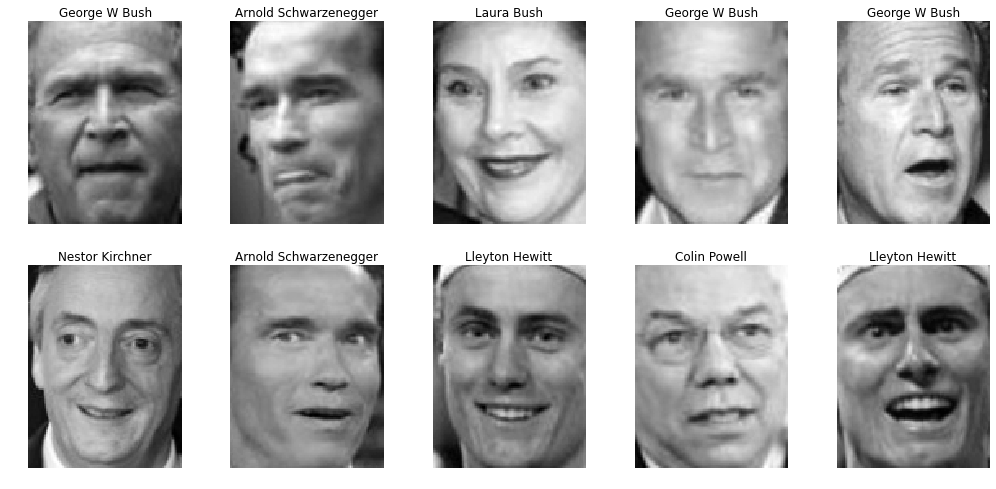

In [9]:
def plot_image(image_id):
    plt.title(lfw_people['target_names'][y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')


plot_grid(range(10), nrows=2, ncols=5)

### Решение: